# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression


# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [33]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [34]:
# Set the API base URL
url = "dc8c1cd820c5a9608be1246ed59b8050"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={cities}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = request.get(city_url)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = url['Lat']
        city_lng = url['Lng']
        city_max_temp = url['Max Temp']
        city_humidity = url['Humidity']
        city_clouds = url['Cloudiness']
        city_wind = url['Wind Speed']
        city_country = url['Country']
        city_date = url['Date']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
City not found. Skipping...
Processing Record 2 of Set 1 | nha trang
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
City not found. Skipping...
Processing Record 4 of Set 1 | castro
City not found. Skipping...
Processing Record 5 of Set 1 | qaanaaq
City not found. Skipping...
Processing Record 6 of Set 1 | bluff
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
City not found. Skipping...
Processing Record 9 of Set 1 | mapiripan
City not found. Skipping...
Processing Record 10 of Set 1 | port alfred
City not found. Skipping...
Processing Record 11 of Set 1 | vaini
City not found. Skipping...
Processing Record 12 of Set 1 | sarangani
City not found. Skipping...
Processing Record 13 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 14 of Set 1 | pitimbu
City not found

In [35]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.read_csv('cities.csv')

# Show Record Count

city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       574
Date          577
dtype: int64

In [36]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


In [37]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities_output.csv", index_label="City_ID")

In [38]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities_output.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

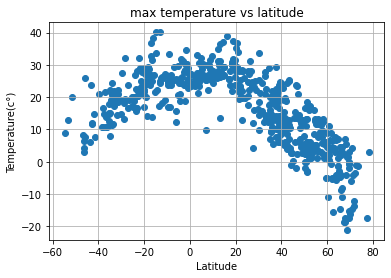

In [39]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis,y_axis)

# details
plt.title("max temperature vs latitude")
plt.xlabel('Latitude')
plt.ylabel('Temperature(c°)')
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

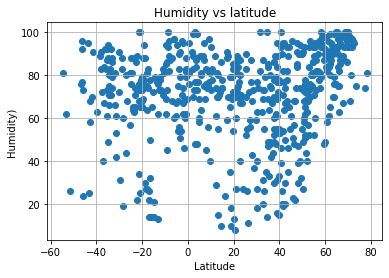

In [40]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("Humidity vs latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

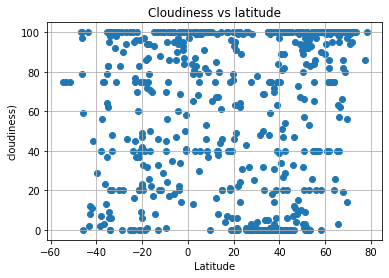

In [41]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("Cloudiness vs latitude")
plt.xlabel('Latitude')
plt.ylabel('cloudiness)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

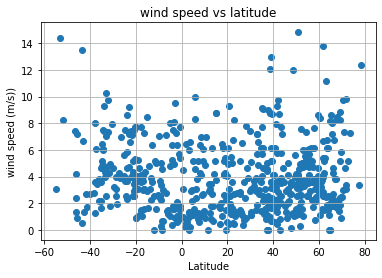

In [42]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df['Wind Speed']
plt.scatter(x_axis,y_axis)

# Incorporate the other graph properties
plt.title("wind speed vs latitude")
plt.xlabel('Latitude')
plt.ylabel('wind speed (m/s))')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [43]:
# Define a function to create Linear Regression plots

def linear_regression_function(x_axis, y_axis):
    x_latitude = north_hemi_df['Lat'].astype('float')
    y_temp = north_hemi_df['Max Temp'].astype('float')

    # linear regression function
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temp)
    regress_values = x_latitude * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

    # Plot scatter plot and regression line
    plt.scatter(x_latitude, y_temp)
    plt.plot(x_latitude,regress_values,"r-")
    plt.annotate(line_eq,(45,30),fontsize=15,color="red")

    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.title("Maximum temperature vs latitude \n in the northern hemisphere, fontsize=14")

    # Print r square value
    print(f"R squared: {rvalue**2}")

    # Show plot
    plt.show()


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df.copy()
north_hemi_df = north_hemi_df[north_hemi_df.Lat >= 0]


# Display sample data
north_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df.copy()
south_hemi_df = south_hemi_df[south_hemi_df.Lat <= 0]
# Display sample data
south_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7161472181434125
3.043276656921281e-109


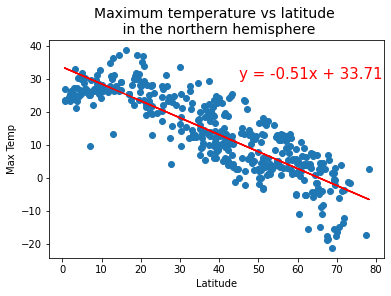

In [46]:
# Linear regression on Northern Hemisphere
x_latitude = north_hemi_df['Lat'].astype('float')
y_temp = north_hemi_df['Max Temp'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temp)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_temp)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(45,30),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("Maximum temperature vs latitude \n in the northern hemisphere", fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")
print(pvalue)
# Show plot
plt.show()


R squared: 0.4121057168607252
1.2113087227697906e-22


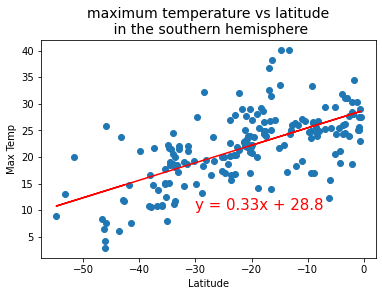

In [47]:
# Linear regression on Southern Hemisphere

x_latitude = south_hemi_df['Lat'].astype('float')
y_temp = south_hemi_df['Max Temp'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_temp)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_temp)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title("maximum temperature vs latitude\n in the southern hemisphere", fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")

print(pvalue)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

r value of 0.64 shows that there is a moderate positive correlation and with a p value wayyy below 0.05 that suggests it it statistically signifigant 0.85 is a strong correlation


### Humidity vs. Latitude Linear Regression Plot

R squared: 0.05689741545789608


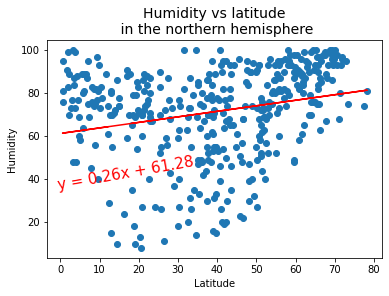

In [48]:
# Northern Hemisphere
#set axis data
x_latitude = north_hemi_df['Lat'].astype('float')
y_humidity = north_hemi_df['Humidity'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_humidity)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_humidity)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(-1,35),fontsize=15,color="red", rotation=10)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs latitude\n in the northern hemisphere",fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.0002808747046324618
0.016759316950056818


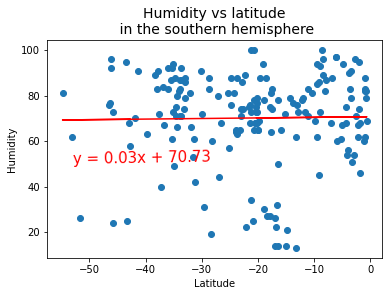

In [49]:
# Southern Hemisphere
x_latitude = south_hemi_df['Lat'].astype('float')
y_humidity = south_hemi_df['Humidity'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_humidity)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_humidity)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(-53,50),fontsize=15,color="red", rotation=1)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Humidity vs latitude\n in the southern hemisphere",fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")

print(rvalue)
# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

rvalue of 0.017 shows that there is very little correlation to be found

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.024026517125811043


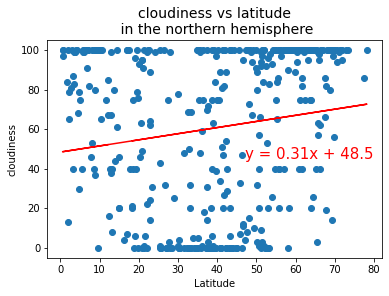

In [50]:
# Northern Hemisphere

x_latitude = north_hemi_df['Lat'].astype('float')
y_cloud = north_hemi_df['Cloudiness'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_cloud)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_cloud)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(47,45),fontsize=15,color="red", rotation=0)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title("cloudiness vs latitude\n in the northern hemisphere",fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.020567354299943663
0.14341322916643243


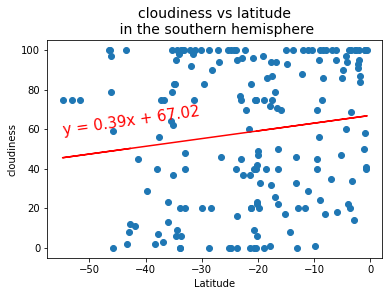

In [51]:
# Southern Hemisphere

x_latitude = south_hemi_df['Lat'].astype('float')
y_cloud = south_hemi_df['Cloudiness'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_cloud)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_cloud)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(-55,57),fontsize=15,color="red", rotation=8)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.title("cloudiness vs latitude\n in the southern hemisphere",fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")

print(rvalue)
# Show plot
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

r value of 0.143 is a weak correlation 

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.030396762354449474


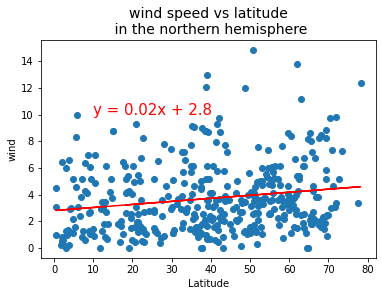

In [52]:
# Northern Hemisphere
x_latitude = north_hemi_df['Lat'].astype('float')
y_wind = north_hemi_df['Wind Speed'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_wind)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_wind)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red", rotation=0)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('wind')
plt.title("wind speed vs latitude\n in the northern hemisphere",fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.06223904070051575
0.0006598079042199041


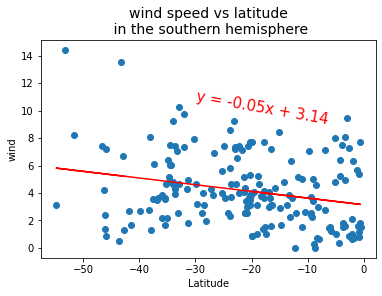

In [53]:
# Southern Hemisphere

x_latitude = south_hemi_df['Lat'].astype('float')
y_wind = south_hemi_df['Wind Speed'].astype('float')

# linear regression function
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_latitude, y_wind)
regress_values = x_latitude * slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"

# Plot scatter plot and regression line
plt.scatter(x_latitude, y_wind)
plt.plot(x_latitude,regress_values,"r-")
plt.annotate(line_eq,(-30,9),fontsize=15,color="red", rotation=-10)

# Label plot
plt.xlabel('Latitude')
plt.ylabel('wind')
plt.title("wind speed vs latitude\n in the southern hemisphere",fontsize=14)

# Print r square value
print(f"R squared: {rvalue**2}")
print(pvalue)
# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

rvalue of -o.25 is a weak correlation and pvalue of 0.00066 confirms it is statistically signifigant